In [ ]:
#Création d'une série temporelle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Génération de la série temporelle ---
n = 100  # 5 ans de données mensuelles
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
p = 12
sigma = 5

trend = beta0 + beta1 * t
seasonality = A * np.sin(2 * np.pi * t / p) #####
noise = np.random.normal(0, sigma, n) ####

sales = trend + seasonality + noise

modèle de régression naif

--- Paramètres du modèle ---
Intercept (a) : 8.324
Coefficient (b): 0.965

--- Métriques (TRAIN) ---
MAE  : 9.275
MSE  : 124.309
RMSE : 11.149
R²   : 0.947
MAPE : 5.51%

--- Métriques (TEST) ---
MAE  : 9.873
MSE  : 139.111
RMSE : 11.795
R²   : 0.658
MAPE : 3.48%

Prédiction du prochain point y_(n+1) à partir de y_n = 322.75 -> 319.68


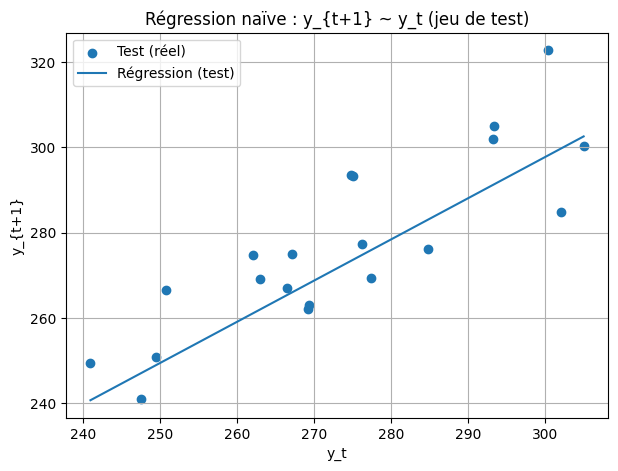

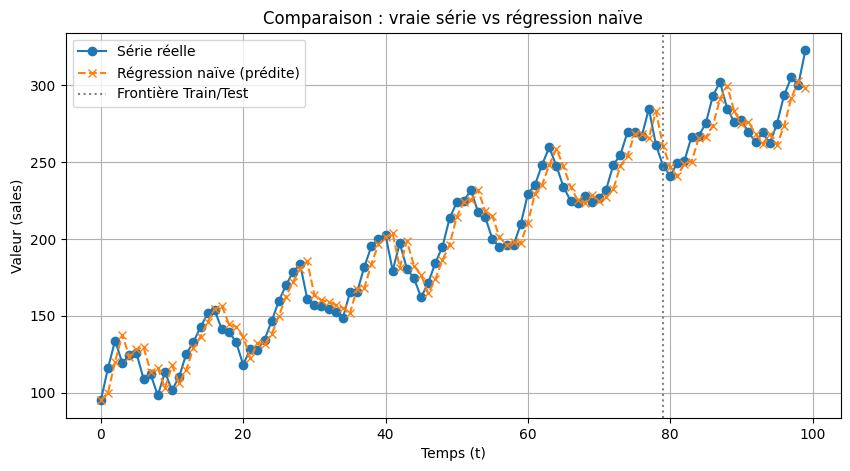

In [ ]:
# --- Construction du jeu (y_t -> y_{t+1}) ---
X = sales[:-1].reshape(-1, 1)   # y_t
y = sales[1:]                   # y_{t+1}

# --- Split train/test (chronologique pour respecter la série) ---
# on garde les 80% premiers pour train et les 20% derniers pour test
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# --- Régression linéaire naïve y_{t+1} = a + b * y_t ---
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# --- Métriques ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = mape(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = mape(y_test, y_pred_test)

print(f"--- Paramètres du modèle ---")
print(f"Intercept (a) : {model.intercept_:.3f}")
print(f"Coefficient (b): {model.coef_[0]:.3f}")

print("\n--- Métriques (TRAIN) ---")
print(f"MAE  : {mae_train:.3f}")
print(f"MSE  : {mse_train:.3f}")
print(f"RMSE : {rmse_train:.3f}")
print(f"R²   : {r2_train:.3f}")
print(f"MAPE : {mape_train:.2f}%")

print("\n--- Métriques (TEST) ---")
print(f"MAE  : {mae_test:.3f}")
print(f"MSE  : {mse_test:.3f}")
print(f"RMSE : {rmse_test:.3f}")
print(f"R²   : {r2_test:.3f}")
print(f"MAPE : {mape_test:.2f}%")

# --- Prédiction du prochain point y_{n+1} à partir de y_n ---
y_next = model.predict([[sales[-1]]])[0]
print(f"\nPrédiction du prochain point y_(n+1) à partir de y_n = {sales[-1]:.2f} -> {y_next:.2f}")

# (Optionnel) Visualisation: nuage de points TEST + droite de régression
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, label="Test (réel)")
# Pour tracer une droite propre, on trie X_test
order = np.argsort(X_test[:,0])
plt.plot(X_test[order], y_pred_test[order], label="Régression (test)")
plt.xlabel("y_t")
plt.ylabel("y_{t+1}")
plt.title("Régression naïve : y_{t+1} ~ y_t (jeu de test)")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2 : Série réelle vs Prédite ---
# On reconstruit les prédictions dans l'ordre temporel
# (On décale y_pred_train et y_pred_test pour suivre la chronologie)
y_pred_full = np.concatenate([[sales[0]], y_pred_train, y_pred_test])

plt.figure(figsize=(10,5))
plt.plot(sales, label='Série réelle', marker='o')
plt.plot(y_pred_full, label='Régression naïve (prédite)', linestyle='--', marker='x')
plt.axvline(split_idx, color='gray', linestyle=':', label='Frontière Train/Test')
plt.title("Comparaison : vraie série vs régression naïve")
plt.xlabel("Temps (t)")
plt.ylabel("Valeur (sales)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive

# --- Création du DataFrame des métriques ---
metrics_df = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'MAE': [mae_train, mae_test],
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'R2': [r2_train, r2_test],
    'MAPE (%)': [mape_train, mape_test]
})

# --- Sauvegarde locale ---
metrics_path = '/content/naive_regression_metrics.csv'
metrics_df.to_csv(metrics_path, index=False)
print(f"Métriques sauvegardées sous : {metrics_path}")

# --- (Optionnel) Montage de Google Drive ---
drive.mount('/content/drive')

# --- Copie du fichier vers ton Drive ---
drive_path = '/content/drive/MyDrive/deep_labs/time_series\naive_regression_metrics.csv'
!cp $metrics_path $drive_path
print(f"✅ Fichier copié sur ton Drive : {drive_path}")

# --- Aperçu du tableau ---
print("\nAperçu :")
display(metrics_df)


Métriques sauvegardées sous : /content/naive_regression_metrics.csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: line 2: aive_regression_metrics.csv: command not found
✅ Fichier copié sur ton Drive : /content/drive/MyDrive/deep_labs/time_series
aive_regression_metrics.csv

Aperçu :


,Set,MAE,MSE,RMSE,R2,MAPE (%)
0,Train,9.275438,124.309004,11.149395,0.946946,5.513906
1,Test,9.872839,139.110589,11.794515,0.658186,3.483874


modèle de régression avec **y en fct de t**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Génération de la série temporelle ---
n = 60  # 5 ans de données mensuelles
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
p = 12
sigma = 5

trend = beta0 + beta1 * t
seasonality = A * np.sin(2 * np.pi * t / p)
noise = np.random.normal(0, sigma, n)

sales = trend + seasonality + noise

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

--- Paramètres du modèle ---
Intercept (b) : 102.793
Coefficient (a): 1.856

--- Métriques (TRAIN) ---
MAE  : 12.324
RMSE : 14.097
R²   : 0.769

--- Métriques (TEST) ---
MAE  : 13.947
RMSE : 15.756
R²   : -0.658


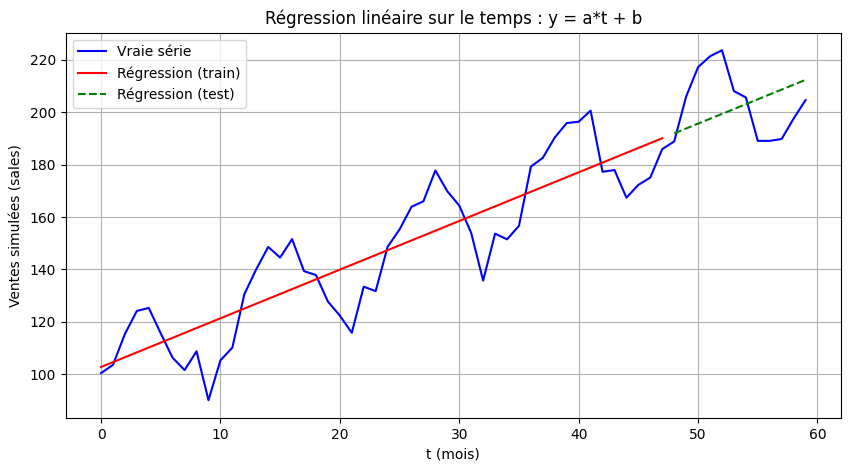


Prévision pour t = 60 (prochain mois) : y_next = 214.15


In [ ]:
# --- Split chronologique train/test ---
split_idx = int(0.8 * len(t))
t_train, t_test = t[:split_idx].reshape(-1, 1), t[split_idx:].reshape(-1, 1)
# Use sales for splitting y to ensure consistent lengths
y_train, y_test = sales[:split_idx], sales[split_idx:]

# --- Régression linéaire : y = a*t + b ---
model_trend = LinearRegression()
model_trend.fit(t_train, y_train)

# --- Prédictions ---
y_pred_train = model_trend.predict(t_train)
y_pred_test = model_trend.predict(t_test)

# --- Métriques ---
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"--- Paramètres du modèle ---")
print(f"Intercept (b) : {model_trend.intercept_:.3f}")
print(f"Coefficient (a): {model_trend.coef_[0]:.3f}")

print("\n--- Métriques (TRAIN) ---")
print(f"MAE  : {mae_train:.3f}")
print(f"RMSE : {rmse_train:.3f}")
print(f"R²   : {r2_train:.3f}")

print("\n--- Métriques (TEST) ---")
print(f"MAE  : {mae_test:.3f}")
print(f"RMSE : {rmse_test:.3f}")
print(f"R²   : {r2_test:.3f}")

# --- Visualisation ---
plt.figure(figsize=(10,5))
plt.plot(t, sales, label='Vraie série', color='blue') # Plotting original sales
plt.plot(t_train, y_pred_train, color='red', label='Régression (train)')
plt.plot(t_test, y_pred_test, color='green', linestyle='--', label='Régression (test)')
plt.title("Régression linéaire sur le temps : y = a*t + b")
plt.xlabel("t (mois)")
plt.ylabel("Ventes simulées (sales)")
plt.legend()
plt.grid(True)
plt.show()

# --- Prédiction future (t = n, n+1, etc.) ---
t_next = np.array([[n]])  # prochain mois
y_next = model_trend.predict(t_next)[0]
print(f"\nPrévision pour t = {n} (prochain mois) : y_next = {y_next:.2f}")

création d'une data fenétrée **w=30**

X_train shape: (24, 30)
y_train shape: (24,)
X_valid shape: (6, 30)
y_valid shape: (6,)

--- Métriques (TRAIN) ---
MAE: 0.000
MSE: 0.000
RMSE: 0.000
R2: 1.000
MAPE(%): 0.000

--- Métriques (VALID) ---
MAE: 5.343
MSE: 41.610
RMSE: 6.451
R2: 0.179
MAPE(%): 2.726


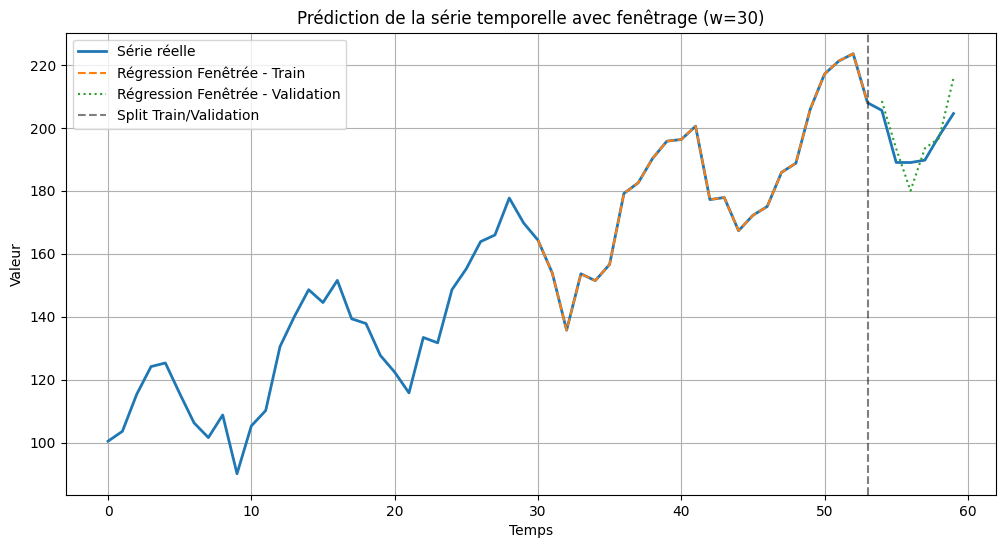

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Série et axe temporel ---
time = np.arange(len(sales))  # si tu avais déjà 't', ce sera équivalent

# --- Fonction de fenêtrage ---
def create_window_features(series, w):
    """
    Crée des features pour une régression en utilisant une fenêtre glissante.
    series : array-like, série temporelle
    w : int, taille de la fenêtre
    Retour : X (n-w, w), y (n-w,)
    """
    series = np.asarray(series, dtype=float)
    if w >= len(series):
        raise ValueError("La taille de fenêtre w doit être < longueur de la série.")
    X, y = [], []
    for i in range(len(series) - w):
        X.append(series[i:i+w])
        y.append(series[i+w])
    return np.array(X), np.array(y)

# --- Taille de fenêtre ---
w = 30
X, Y = create_window_features(sales, w)

# --- Split train/validation chronologique ---
split_index = int(len(X) * 0.8)  # 80% train / 20% valid
X_train, X_valid = X[:split_index], X[split_index:]
y_train, y_valid = Y[:split_index], Y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

# --- Modèle linéaire ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Prédictions ---
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

# --- Métriques ---
def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    # éviter division par zéro (si la série peut toucher 0)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100

def evaluate_forecast(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mape_val = mape(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2, "MAPE(%)": mape_val}

metrics_train = evaluate_forecast(y_train, y_pred_train)
metrics_valid = evaluate_forecast(y_valid, y_pred_valid)

print("\n--- Métriques (TRAIN) ---")
for k, v in metrics_train.items():
    print(f"{k}: {v:.3f}")

print("\n--- Métriques (VALID) ---")
for k, v in metrics_valid.items():
    print(f"{k}: {v:.3f}")

# --- Alignement temporel pour le tracé ---
# Pour X construit à partir de fenêtres de taille w :
# - la première prédiction correspond à l'instant t = w
# - la dernière correspond à t = w + len(Y) - 1
t_pred_full = time[w : w + len(Y)]
t_pred_train = t_pred_full[:split_index]
t_pred_valid = t_pred_full[split_index:]

# --- Tracés ---
plt.figure(figsize=(12,6))
plt.plot(time, sales, label="Série réelle", linewidth=2)

# Train
plt.plot(t_pred_train, y_pred_train, label="Régression Fenêtrée - Train",
         linestyle="--")

# Validation
plt.plot(t_pred_valid, y_pred_valid, label="Régression Fenêtrée - Validation",
         linestyle=":")

# Ligne de split au bon endroit (fin du train pour Y, donc t = w + split_index - 1)
split_time = time[w + split_index - 1] if split_index > 0 else time[w]
plt.axvline(x=split_time, color='black', linestyle='--', alpha=0.5,
            label='Split Train/Validation')

plt.title(f"Prédiction de la série temporelle avec fenêtrage (w={w})")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.show()


introduction des réseaux de neuronnes

--- Métriques (TRAIN) ---
MAE: 113.8156
MSE: 16732.9773
RMSE: 129.3560
R2: -11.6846
MAPE: 52.4577

--- Métriques (VALID) ---
MAE: 26.6525
MSE: 986.9109
RMSE: 31.4151
R2: -2.8010
MAPE: 9.2259


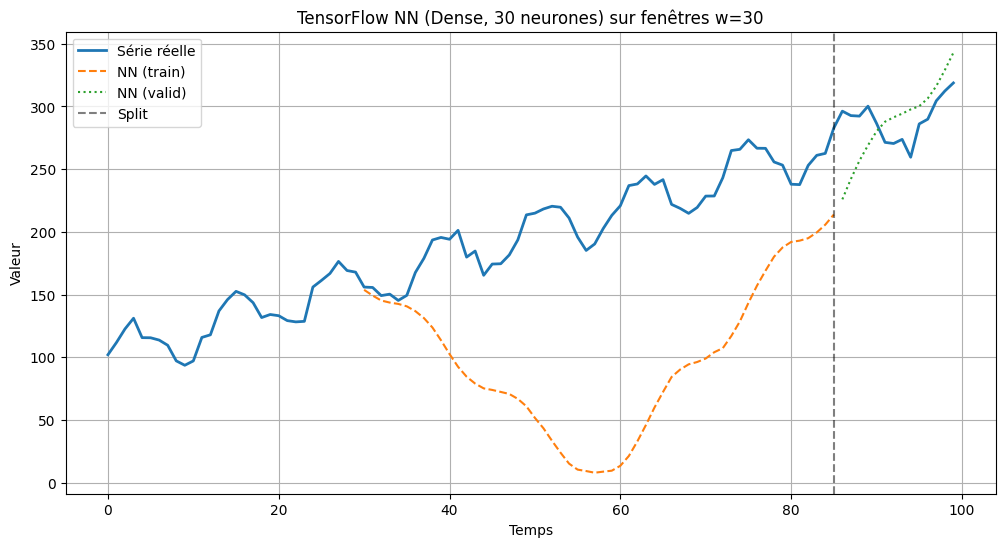

Prévision pour t = 100 : y_next = 357.16


In [9]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- Série utilisée : 'sales' doit exister déjà ---
series = np.asarray(sales, dtype=float)
time = np.arange(len(series))

# --- Fenêtrage ---
def create_window_features(series, w):
    X, y = [], []
    for i in range(len(series) - w):
        X.append(series[i:i+w])
        y.append(series[i+w])
    return np.array(X), np.array(y)

# Taille de fenêtre (tu peux changer)
w = 30
X, Y = create_window_features(series, w)

# Split chronologique 80/20
split_index = int(0.8 * len(X))
X_train, X_valid = X[:split_index], X[split_index:]
y_train, y_valid = Y[:split_index], Y[split_index:]

# --- Normalisation (conseillé pour NN) : fit sur TRAIN uniquement ---
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

# --- Définition du modèle : 1 couche cachée avec 'w' neurones ---
# y = f(x_window) -> scalaire
tf.random.set_seed(42)
model = keras.Sequential([
    layers.Input(shape=(w,)),
    layers.Dense(w, activation='relu'),   # nombre de neurones = taille de la fenêtre
    layers.Dense(1)                       # sortie scalaire
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse',
              metrics=[keras.metrics.MAE, keras.metrics.MAPE])

# Early stopping pour éviter l'overfit
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_valid_s, y_valid),
    epochs=500,
    batch_size=16,
    callbacks=[es],
    verbose=0
)

# --- Prédictions ---
y_pred_train = model.predict(X_train_s, verbose=0).ravel()
y_pred_valid = model.predict(X_valid_s, verbose=0).ravel()

# --- Métriques utilitaires ---
def mape_np(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    return np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100

def eval_metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    mape = mape_np(y_true, y_pred)
    return dict(MAE=mae, MSE=mse, RMSE=rmse, R2=r2, MAPE=mape)

metrics_train = eval_metrics(y_train, y_pred_train)
metrics_valid = eval_metrics(y_valid, y_pred_valid)

print("--- Métriques (TRAIN) ---")
for k, v in metrics_train.items():
    print(f"{k}: {v:.4f}")
print("\n--- Métriques (VALID) ---")
for k, v in metrics_valid.items():
    print(f"{k}: {v:.4f}")

# --- Alignement temporel pour affichage ---
# La 1ère cible correspond à t = w ; la dernière à t = w + len(Y) - 1
t_pred_full  = time[w : w + len(Y)]
t_pred_train = t_pred_full[:split_index]
t_pred_valid = t_pred_full[split_index:]

# --- Plots ---
plt.figure(figsize=(12,6))
plt.plot(time, series, label="Série réelle", linewidth=2)
plt.plot(t_pred_train, y_pred_train, label="NN (train)", linestyle='--')
plt.plot(t_pred_valid, y_pred_valid, label="NN (valid)", linestyle=':')
plt.axvline(x=time[w + split_index - 1], color='black', linestyle='--', alpha=0.5, label='Split')
plt.title(f"TensorFlow NN (Dense, {w} neurones) sur fenêtres w={w}")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.grid(True)
plt.legend()
plt.show()

# --- Prévision du point suivant (t = len(series)) ---
# On construit la dernière fenêtre (les w derniers points), on la scale, et on prédit
last_window = series[-w:]
last_window_s = scaler.transform(last_window.reshape(1, -1))
y_next = model.predict(last_window_s, verbose=0).ravel()[0]
print(f"Prévision pour t = {len(series)} : y_next = {y_next:.2f}")


In [10]:
import pandas as pd
import os
from google.colab import drive

# Créer le DataFrame des métriques
metrics_df = pd.DataFrame([
    {"Set": "Train", **metrics_train},
    {"Set": "Valid", **metrics_valid},
])

# Sauvegarde locale (optional, if you want a local copy too)
# local_path = "/content/nn_window_metrics.csv"
# metrics_df.to_csv(local_path, index=False)
# print(f"Métriques sauvegardées localement : {local_path}")


# Monter le Drive
drive.mount("/content/drive")

# Dossier cible dans Drive (tu peux changer le chemin)
drive_dir = "/content/drive/MyDrive/deep_labs/time_series"
os.makedirs(drive_dir, exist_ok=True)
drive_path = os.path.join(drive_dir, "nn_window_metrics.csv")

# Sauvegarder directement vers Drive
metrics_df.to_csv(drive_path, index=False)
print(f"✅ Métriques sauvegardées sur ton Drive : {drive_path}")

# Aperçu
print("\nAperçu :")
display(metrics_df)

Mounted at /content/drive
✅ Métriques sauvegardées sur ton Drive : /content/drive/MyDrive/deep_labs/time_series/nn_window_metrics.csv

Aperçu :


,Set,MAE,MSE,RMSE,R2,MAPE
0,Train,113.815594,16732.977259,129.356010,-11.684634,52.457673
1,Valid,26.652530,986.910945,31.415139,-2.800996,9.225922


RNN - GRU - LSTM - CNN

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Génération de la série temporelle ---
n = 100  # 100 mois (~8 ans)
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
p = 12
sigma = 5

trend = beta0 + beta1 * t
seasonality = A * np.sin(2 * np.pi * t / p)
noise = np.random.normal(0, sigma, n)

sales = trend + seasonality + noise

# --- Split train/test chronologique ---
split_ratio = 0.8
split_idx = int(len(sales) * split_ratio)
train_series = sales[:split_idx]
valid_series = sales[split_idx:]

# --- Normalisation ---
scaler = StandardScaler()
X_train_s = scaler.fit_transform(train_series.reshape(-1, 1)).flatten()
X_valid_s = scaler.transform(valid_series.reshape(-1, 1)).flatten()

# --- Fonction pour créer les datasets fenêtrés ---
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    # Add channel dimension for CNN
    dataset = dataset.map(lambda x, y: (tf.expand_dims(x, axis=-1), y))
    return dataset

def windowed_dataset_no_shuffle(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))  # pas de shuffle
    dataset = dataset.batch(batch_size).prefetch(1)
    # Add channel dimension for CNN
    dataset = dataset.map(lambda x, y: (tf.expand_dims(x, axis=-1), y))
    return dataset

# --- Paramètres ---
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# --- Création des datasets ---
train_dataset = windowed_dataset(X_train_s, window_size, batch_size, shuffle_buffer_size)
test_dataset  = windowed_dataset_no_shuffle(X_valid_s, window_size, batch_size)

# --- Vérification ---
for X_batch, y_batch in train_dataset.take(1):
    print("Train batch shapes:", X_batch.shape, y_batch.shape)

for X_batch, y_batch in test_dataset.take(1):
    print("Test batch shapes:", X_batch.shape, y_batch.shape)

Train batch shapes: (32, 20, 1) (32,)


In [26]:
def build_CNN_1D(window):
    return keras.Sequential([
        layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(window,1)),
        layers.MaxPooling1D(2),
        layers.Reshape((-1,)), # Add Reshape layer here
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

def build_RNN(window):
    return keras.Sequential([
        layers.SimpleRNN(64, return_sequences=False, input_shape=(window,1)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

def build_GRU(window):
    return keras.Sequential([
        layers.GRU(64, return_sequences=False, input_shape=(window,1)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

def build_LSTM(window):
    return keras.Sequential([
        layers.LSTM(64, return_sequences=False, input_shape=(window,1)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

def build_LSTM_combined_to_CNN(window):
    inp = keras.Input(shape=(window,1))
    x = layers.LSTM(64, return_sequences=True)(inp)
    x = layers.Conv1D(32, kernel_size=3, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(1)(x)
    return keras.Model(inputs=inp, outputs=out)

In [31]:
def evaluate_metrics(y_true, y_pred):
    # Explicitly convert inputs to tensors to ensure consistency
    y_true = tf.constant(y_true, dtype=tf.float32)
    y_pred = tf.constant(y_pred, dtype=tf.float32)

    mae = mean_absolute_error(y_true.numpy(), y_pred.numpy()) # Use .numpy() for sklearn metrics
    mse = mean_squared_error(y_true.numpy(), y_pred.numpy())
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true.numpy(), y_pred.numpy())
    mape = tf.reduce_mean(tf.abs((y_true - y_pred)/(y_true+1e-8)))*100 # Use tf operations for MAPE
    return dict(MAE=mae, MSE=mse, RMSE=rmse, R2=r2, MAPE=mape.numpy()) # Return MAPE as numpy value

def train_and_evaluate(model_fn, model_name, train_ds, valid_ds, epochs=100):
    model = model_fn(window_size)
    model.compile(optimizer='adam', loss='mse')
    ckpt_path = f"/content/{model_name}.keras"
    callbacks = [
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only=True)
    ]
    hist = model.fit(train_ds, validation_data=valid_ds, epochs=epochs, verbose=0, callbacks=callbacks)
    model.save(ckpt_path)

    # Évaluer sur validation
    y_true, y_pred = [], []
    # Add error handling for iterating through the dataset
    try:
        for Xb, yb in valid_ds:
            if Xb is not None and yb is not None:
                # Explicitly convert batches to NumPy arrays before processing
                Xb_np = Xb.numpy()
                yb_np = yb.numpy()
                y_true.extend(yb_np)
                y_pred.extend(model.predict(Xb_np, verbose=0).flatten())
            else:
                print(f"Warning: Received None batch in {model_name} validation dataset.")
    except Exception as e:
        print(f"Error processing validation dataset for {model_name}: {e}")
        # If an error occurs during dataset iteration, return default metrics or raise the error
        return {'Model': model_name, 'MAE': np.nan, 'MSE': np.nan, 'RMSE': np.nan, 'R2': np.nan, 'MAPE': np.nan}


    if len(y_true) == 0:
        print(f"Warning: No data collected for validation metrics for model {model_name}. Check dataset creation and split.")
        return {'Model': model_name, 'MAE': np.nan, 'MSE': np.nan, 'RMSE': np.nan, 'R2': np.nan, 'MAPE': np.nan}

    metrics = evaluate_metrics(np.array(y_true), np.array(y_pred))
    metrics['Model'] = model_name
    print(f"{model_name}: R2={metrics['R2']:.3f}, RMSE={metrics['RMSE']:.2f}")
    return metrics

In [33]:
# --- Function for creating the datasets ---
def create_window_features(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

# --- Parameters ---
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# --- Creation of the datasets ---
# Assuming 'X_train_s' and 'X_valid_s' are already defined and scaled

# Combine scaled train and valid series to create full windowed data
full_scaled_series = np.concatenate((X_train_s, X_valid_s))
X_full_windowed, y_full_windowed = create_window_features(full_scaled_series, window_size)

# Calculate split index based on the number of windowed samples
split_idx_windowed = int(len(X_full_windowed) * 0.8) # 80% for training

# Split the windowed data
X_train_windowed, X_valid_windowed = X_full_windowed[:split_idx_windowed], X_full_windowed[split_idx_windowed:]
y_train_windowed, y_valid_windowed = y_full_windowed[:split_idx_windowed], y_full_windowed[split_idx_windowed:]

# Convert NumPy arrays to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_windowed, y_train_windowed))
train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(1)

valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_windowed, y_valid_windowed))
valid_dataset = valid_dataset.batch(batch_size).prefetch(1)

# Add channel dimension for CNN (only needed for CNN models)
train_dataset_cnn = train_dataset.map(lambda x, y: (tf.expand_dims(x, axis=-1), y))
valid_dataset_cnn = valid_dataset.map(lambda x, y: (tf.expand_dims(x, axis=-1), y))


models = {
    "CNN_1D": build_CNN_1D,
    "RNN": build_RNN,
    "GRU": build_GRU,
    "LSTM": build_LSTM,
    "LSTM_CNN": build_LSTM_combined_to_CNN
}

results = []
for name, fn in models.items():
    # Use appropriate dataset based on model type
    if name == "CNN_1D" or name == "LSTM_CNN":
        metrics = train_and_evaluate(fn, name, train_dataset_cnn, valid_dataset_cnn, epochs=100)
    else:
        metrics = train_and_evaluate(fn, name, train_dataset, valid_dataset, epochs=100)
    results.append(metrics)

metrics_df = pd.DataFrame(results)
metrics_path = "/content/drive/MyDrive/deep_labs/time_series/metrics/models_metrics.csv"
metrics_df.to_csv(metrics_path, index=False)
metrics_df

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN_1D: R2=0.816, RMSE=0.15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


RNN: R2=0.419, RMSE=0.27


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU: R2=-0.144, RMSE=0.38


LSTM: R2=-0.035, RMSE=0.36
LSTM_CNN: R2=-0.340, RMSE=0.41


,MAE,MSE,RMSE,R2,MAPE,Model
0,0.120331,0.023647,0.153775,0.815609,6.241132,CNN_1D
1,0.218391,0.074532,0.273005,0.418822,9.581100,RNN
2,0.345969,0.146749,0.383079,-0.144308,16.864079,GRU
3,0.297109,0.132768,0.364374,-0.035288,14.135368,LSTM
4,0.373608,0.171888,0.414593,-0.340328,17.772160,LSTM_CNN


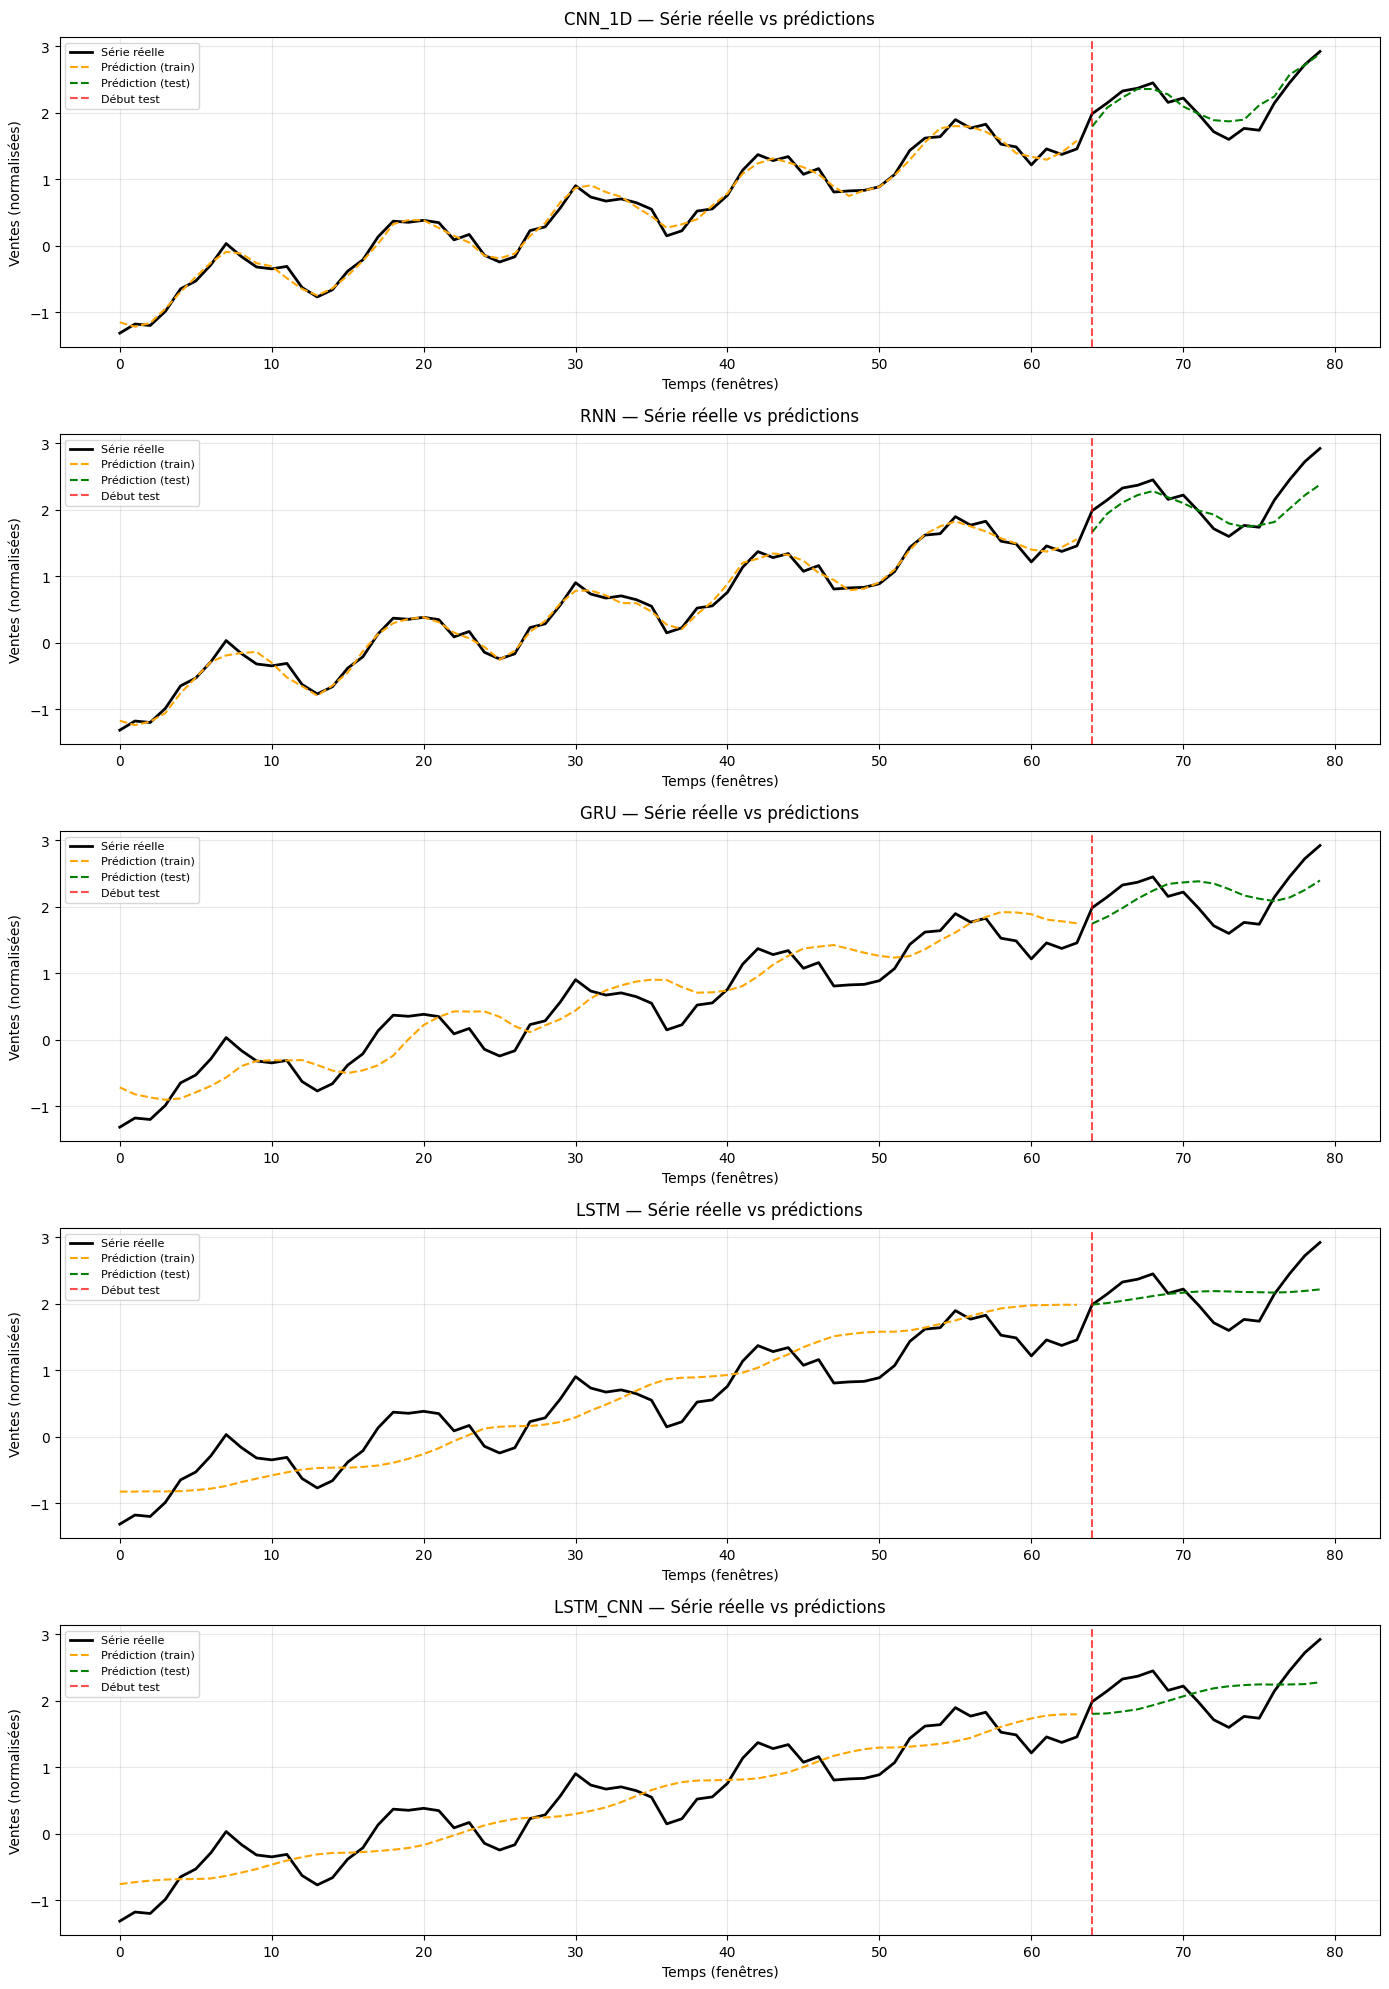

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# --- Fonction de visualisation ---
def plot_predictions_all_models(models_dict,
                                X_train_windowed, y_train_windowed,
                                X_valid_windowed, y_valid_windowed,
                                split_idx):
    """
    Affiche pour chaque modèle (CNN, RNN, LSTM, GRU, LSTM+CNN)
    la série réelle + prédictions sur train/test.
    """
    plt.figure(figsize=(14, 20))
    n_models = len(models_dict)

    y_full = np.concatenate([y_train_windowed, y_valid_windowed])

    for i, (name, fn) in enumerate(models_dict.items(), 1):
        # Charger le modèle sauvegardé
        model_path = f"/content/{name}.keras"
        try:
            model = tf.keras.models.load_model(model_path)
        except:
            print(f"⚠️ Modèle {name} non trouvé à {model_path}")
            continue

        # Adapter la forme d’entrée
        if name in ("CNN_1D", "LSTM_CNN"):
            X_train_input = np.expand_dims(X_train_windowed, axis=-1)
            X_valid_input = np.expand_dims(X_valid_windowed, axis=-1)
        else:
            X_train_input = X_train_windowed
            X_valid_input = X_valid_windowed

        # Prédictions
        y_train_pred = model.predict(X_train_input, verbose=0).flatten()
        y_test_pred  = model.predict(X_valid_input, verbose=0).flatten()

        # --- Tracé ---
        plt.subplot(n_models, 1, i)
        plt.plot(range(len(y_full)), y_full, label="Série réelle", color="black", linewidth=2)
        plt.plot(range(split_idx), y_train_pred, label="Prédiction (train)", color="orange", linestyle="--")
        plt.plot(range(split_idx, split_idx + len(y_test_pred)), y_test_pred, label="Prédiction (test)", color="green", linestyle="--")
        plt.axvline(x=split_idx, color="red", linestyle="--", alpha=0.7, label="Début test")
        plt.title(f"{name} — Série réelle vs prédictions", fontsize=12, pad=10)
        plt.xlabel("Temps (fenêtres)")
        plt.ylabel("Ventes (normalisées)")
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=8)

    plt.tight_layout()
    plt.show()


# --- Exécution ---
split_idx = len(y_train_windowed)

plot_predictions_all_models(
    models,
    X_train_windowed, y_train_windowed,
    X_valid_windowed, y_valid_windowed,
    split_idx
)


In [35]:
from google.colab import drive
drive.mount('/content/drive')

drive_dir = "/content/drive/MyDrive/deep_labs/time_series/metrics/TimeSeries_Models"
os.makedirs(drive_dir, exist_ok=True)



print(f"✅ Modèles et métriques copiés dans : {drive_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Modèles et métriques copiés dans : /content/drive/MyDrive/deep_labs/time_series/metrics/TimeSeries_Models
